In [40]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch

processor = AutoImageProcessor.from_pretrained("hustvl/yolos-tiny")
model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-tiny")

In [41]:
image = Image.open("data/football-match.jpg")
tensor_image = ToTensor()(image)
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
print(outputs.keys())

odict_keys(['logits', 'pred_boxes', 'last_hidden_state'])


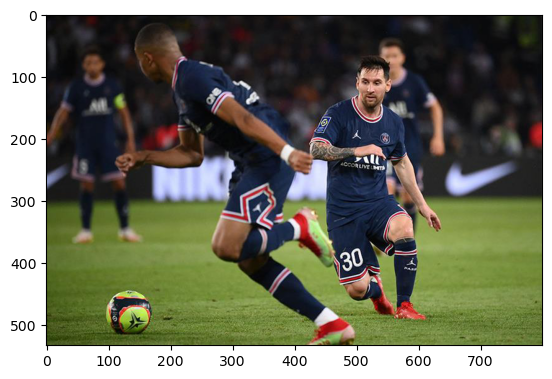

In [46]:
plt.imshow(image)

In [43]:
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected person with confidence 0.996 at location [421.99, 65.18, 643.64, 495.73]
Detected sports ball with confidence 1.0 at location [93.91, 445.81, 175.78, 517.65]
Detected person with confidence 0.989 at location [117.29, 17.43, 505.21, 527.9]
Detected person with confidence 0.999 at location [0.4, 58.09, 150.99, 372.7]
Detected person with confidence 0.987 at location [540.7, 39.62, 644.81, 302.74]


In [45]:
results

{'scores': tensor([0.9963, 0.9998, 0.9887, 0.9993, 0.9871], grad_fn=<IndexBackward0>),
 'labels': tensor([ 1, 37,  1,  1,  1]),
 'boxes': tensor([[4.2199e+02, 6.5178e+01, 6.4364e+02, 4.9573e+02],
         [9.3908e+01, 4.4581e+02, 1.7578e+02, 5.1765e+02],
         [1.1729e+02, 1.7434e+01, 5.0521e+02, 5.2790e+02],
         [3.9858e-01, 5.8086e+01, 1.5099e+02, 3.7270e+02],
         [5.4070e+02, 3.9623e+01, 6.4481e+02, 3.0274e+02]],
        grad_fn=<IndexBackward0>)}